# Import modules

In [1]:
import os
import glob
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
# print(pd.__version__)

# Preliminary analysis, preparation and preprocessing of data for EDA

In [2]:
### Load metadata datasets, then drop unnecessary columns and remove duplicates

# df_meta = pd.read_csv('PanEuropean_metadata.csv', sep="\t")
# df_stat = pd.read_csv('AirBase_v8_stations.csv', sep="\t")
# drop_list2 = ['Countrycode','Timezone','Namespace','AirQualityNetwork','AirQualityStationNatCode','SamplingPoint','SamplingProces','Sample','AirPollutantCode','ObservationDateBegin','ObservationDateEnd','Projection','Altitude','MeasurementType','EquivalenceDemonstrated','MeasurementEquipment','InletHeight','BuildingDistance','KerbDistance']
# drop_list3 = ['station_local_code','type_of_station','station_ozone_classification','station_type_of_area','station_subcat_rural_back','street_type','station_longitude_deg','station_latitude_deg','station_altitude','lau_level1_code','lau_level2_code','lau_level2_name','EMEP_station']
# df_meta.drop(columns=drop_list2, inplace=True)
# df_stat.drop(columns=drop_list3, inplace=True)
# df_meta.drop_duplicates(subset='AirQualityStation', keep='first', inplace=True)
# df_stat.drop_duplicates(subset='station_european_code', keep='first', inplace=True)

In [3]:
### Check metadata column names

# display(df_meta.columns)
# display(df_stat.columns)

In [4]:
### Check metadata info

# display(df_stat.info(verbose=True, show_counts=True))
# display(df_stat.head())
# display(df_meta.info(verbose=True, show_counts=True))
# display(df_meta.head())

In [5]:
### Rename columns in df_stat, then merge to create one combined metadata

# df_stat.rename(columns = {'station_european_code':'AirQualityStationEoICode',
#                           'country_iso_code':'Countrycode',
#                           'country_name':'CountryName',
#                           'station_name':'StationName',
#                           'station_start_date':'StationStartDate',
#                           'station_end_date':'StationEndDate',
#                           'station_city':'StationCity'}, inplace = True)
# meta = df_meta.merge(df_stat, on='AirQualityStationEoICode', how='left')

In [6]:
### Export new combined metadata file

# path_to_home=r'C:\Users\Mint\Downloads\yandex\aqi_eda'
# os.chdir(path_to_home)
# meta.to_csv( "Merged_metadata.csv", index=False, encoding='utf-8-sig')

In [7]:
### Load previously prepared meta dataset

# meta = pd.read_csv('Merged_metadata.csv', low_memory=False)

In [8]:
### Load main dataset, then drop unnecessary columns

# df = pd.read_csv('denmark_and_serbia_all.csv', low_memory=False)
# drop_list1 = ['Namespace','AirQualityNetwork','AirQualityStationEoICode','SamplingPoint','SamplingProcess','Sample','AirPollutantCode']
# df.drop(columns=drop_list1, inplace=True)

In [9]:
### Check datasets info

# display(df.info(verbose=True, show_counts=True))
# display(df.head())

In [10]:
### Convert pollutant names in main dataset to integer

# dict ={'SO2': 1,'PM10': 5,'O3': 7,'NO2': 8,'CO': 10,'PM2.5': 6001}
# df = df[df['AirPollutant'].isin(dict.keys())]
# df.replace({'AirPollutant': dict}, inplace=True)

In [11]:
### Check units of measurements and averaging time for each pollutant

# display(df[df['AirPollutant'] ==1]['UnitOfMeasurement'].unique())
# display(df[df['AirPollutant'] ==5]['UnitOfMeasurement'].unique())
# display(df[df['AirPollutant'] ==7]['UnitOfMeasurement'].unique())
# display(df[df['AirPollutant'] ==8]['UnitOfMeasurement'].unique())
# display(df[df['AirPollutant'] ==10]['UnitOfMeasurement'].unique())
# display(df[df['AirPollutant'] ==6001]['UnitOfMeasurement'].unique())
# display(df[df['AirPollutant'] ==1]['AveragingTime'].value_counts())
# display(df[df['AirPollutant'] ==5]['AveragingTime'].value_counts())
# display(df[df['AirPollutant'] ==7]['AveragingTime'].value_counts())
# display(df[df['AirPollutant'] ==8]['AveragingTime'].value_counts())
# display(df[df['AirPollutant'] ==10]['AveragingTime'].value_counts())
# display(df[df['AirPollutant'] ==6001]['AveragingTime'].value_counts())

In [12]:
### Write pollutants and their corresponding units of measurements into dictionary

pollutants_units = {1:'µg/m3',5:'µg/m3',7:'µg/m3',8:'µg/m3',10:'mg/m3',6001:'µg/m3'}

In [13]:
### Check meta dataframe in order to choose which columns to drop

# meta.info(verbose=True, show_counts=True)
# display(meta.head(2))
# display(meta.columns)

In [14]:
### Drop other columns which will not be used during further EDA in this notebook

# new_drop_list = ['AirQualityStationEoICode','Longitude','Latitude','Countrycode','CountryName','StationName','StationStartDate']
# meta = meta.drop(columns=new_drop_list)
# df.drop(columns=['UnitOfMeasurement'], inplace=True)

In [15]:
### Merge main dataframe and corresponding metadata using left merge

# dff = df.merge(meta, on='AirQualityStation', how='left')

In [16]:
### Check whether there is an obvious direct correlation between Verification and Validity values

# display(dff['Validity'].value_counts())
# display(dff['Verification'].value_counts())
# display(dff.query('Validity==-1 | Validity==-99')['Verification'].value_counts())
# display(dff.query('Verification==2 | Verification==3')['Validity'].value_counts())

Колонки 'Validity','Verification' будут удалены на этапе исследовательского анализа после проверки распределения невалидных и неверифицированных данных по станциям. Аналогично, колонки 'AveragingTime','DatetimeBegin' также будут удалены позже.

In [17]:
### Check whether all stations within our dataset are currently active

# dff.info(verbose=True, show_counts=True)

In [18]:
### Earlier we found out that all stations seem to be active (0 non-null values) so we can drop StationEndDate column as well

# dff.drop(columns=['StationEndDate'], inplace=True)

In [19]:
### Export final preprocessed version of our dataset before EDA

# path_to_home=r'C:\Users\Mint\Downloads\yandex\aqi_eda'
# os.chdir(path_to_home)
# dff.to_csv("denmark_and_serbia_all_v4_final.csv", index=False, encoding='utf-8-sig')

# Exploratory Data Analysis (EDA)

## Part0:

In [20]:
### Import final preprocessed version of our dataset

# df_main = dff
df_main = pd.read_csv('denmark_and_serbia_all_v4_final.csv', low_memory=False)

In [22]:
### Convert datetime columns into proper datetime format

df_main['DatetimeBegin'] = pd.to_datetime(df_main['DatetimeBegin'], format="%Y-%m-%d %H:%M:%S %z")
df_main['DatetimeEnd'] = pd.to_datetime(df_main['DatetimeEnd'], format="%Y-%m-%d %H:%M:%S %z")

In [21]:
### Convert AirPollutant,Validity, Verification columns to int16 to save memory

df_main['AirPollutant'] = df_main['AirPollutant'].astype('int16')
df_main['Validity'] = df_main['Validity'].astype('int16')
df_main['Verification'] = df_main['Verification'].astype('int16')

In [22]:
### Check dataframe info after changing multiple columns datatype

df_main.info(verbose=True, show_counts=True)
display(df_main.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963451 entries, 0 to 6963450
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Countrycode            6963451 non-null  object 
 1   AirQualityStation      6963451 non-null  object 
 2   AirPollutant           6963451 non-null  int16  
 3   AveragingTime          6963451 non-null  object 
 4   Concentration          6541966 non-null  float64
 5   DatetimeBegin          6963451 non-null  object 
 6   DatetimeEnd            6963451 non-null  object 
 7   Validity               6963451 non-null  int16  
 8   Verification           6963451 non-null  int16  
 9   AirQualityStationType  6963451 non-null  object 
 10  AirQualityStationArea  6963451 non-null  object 
 11  StationCity            5430683 non-null  object 
dtypes: float64(1), int16(3), object(8)
memory usage: 518.0+ MB


,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
0,DK,STA-DK0008R,1,day,0.19,2014-07-02 00:00:00 +01:00,2014-07-03 00:00:00 +01:00,1,1,background,rural,NaN


## Part1: Basic EDA

In [23]:
### Check basic stats for all columns in an exact way proposed in third checkpoint description (using describe all)

display(df_main[df_main['AirPollutant']==1].describe(include='all', datetime_is_numeric=True))

,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
count,1082929,1082929,1082929.0,1082929,1.025257e+06,1082929,1082929,1.082929e+06,1.082929e+06,1082929,1082929,990635
unique,2,33,NaN,3,NaN,86047,86046,NaN,NaN,3,4,16
top,RS,STA-RS0028A,NaN,hour,NaN,2020-11-02 00:00:00 +01:00,2022-03-27 03:00:00 +01:00,NaN,NaN,background,urban,BELGRADE
freq,968631,85709,NaN,1069879,NaN,22,30,NaN,NaN,657011,912265,231498
mean,NaN,NaN,1.0,NaN,1.494149e+01,NaN,NaN,7.318218e-01,1.478078e+00,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,4.980507e+01,NaN,NaN,4.581378e+00,8.446755e-01,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,-2.443200e+02,NaN,NaN,-9.900000e+01,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,5.100000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,1.0,NaN,8.664960e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,1.0,NaN,1.423000e+01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN


In [24]:
display(df_main[df_main['AirPollutant']==5].describe(include='all', datetime_is_numeric=True))

,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
count,586423,586423,586423.0,586423,568207.000000,586423,586423,586423.000000,586423.000000,586423,586423,420045
unique,2,30,NaN,3,NaN,86086,86085,NaN,NaN,3,4,11
top,RS,STA-DK0034A,NaN,hour,NaN,2019-04-18 00:00:00 +01:00,2022-03-27 03:00:00 +01:00,NaN,NaN,traffic,urban,BELGRADE
freq,402425,92474,NaN,555942,NaN,22,26,NaN,NaN,311685,490350,186256
mean,NaN,NaN,5.0,NaN,30.216384,NaN,NaN,0.938434,1.729508,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,49.814637,NaN,NaN,0.347880,0.920485,NaN,NaN,NaN
min,NaN,NaN,5.0,NaN,-29779.750000,NaN,NaN,-1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,5.0,NaN,13.148330,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,5.0,NaN,21.600000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,5.0,NaN,35.850000,NaN,NaN,1.000000,3.000000,NaN,NaN,NaN


In [25]:
display(df_main[df_main['AirPollutant']==7].describe(include='all', datetime_is_numeric=True))

,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
count,1292229,1292229,1292229.0,1292229,1.181097e+06,1292229,1292229,1.292229e+06,1.292229e+06,1292229,1292229,918492
unique,2,19,NaN,3,NaN,86086,86085,NaN,NaN,2,3,9
top,DK,STA-DK0012R,NaN,hour,NaN,2013-05-07 00:00:00 +01:00,2013-01-31 00:00:00 +01:00,NaN,NaN,background,urban,BELGRADE
freq,738257,94076,NaN,1291492,NaN,24,24,NaN,NaN,1171949,902242,221594
mean,NaN,NaN,7.0,NaN,5.379499e+01,NaN,NaN,-1.176552e+00,1.286383e+00,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,2.863611e+01,NaN,NaN,1.414795e+01,6.291451e-01,NaN,NaN,NaN
min,NaN,NaN,7.0,NaN,-7.735515e+01,NaN,NaN,-9.900000e+01,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,7.0,NaN,3.270000e+01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,7.0,NaN,5.488800e+01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,7.0,NaN,7.316900e+01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN


In [26]:
display(df_main[df_main['AirPollutant']==8].describe(include='all', datetime_is_numeric=True))

,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
count,2048730,2048730,2048730.0,2048730,1.906928e+06,2048730,2048730,2.048730e+06,2.048730e+06,2048730,2048730,1535753
unique,2,41,NaN,3,NaN,86047,86046,NaN,NaN,3,4,18
top,DK,STA-DK0012R,NaN,hour,NaN,2013-04-03 00:00:00 +01:00,2013-12-03 00:00:00 +01:00,NaN,NaN,background,urban,BELGRADE
freq,1137743,93966,NaN,2042509,NaN,43,43,NaN,NaN,1393841,1494070,317203
mean,NaN,NaN,8.0,NaN,2.040167e+01,NaN,NaN,-1.579720e-01,1.320324e+00,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,2.017470e+01,NaN,NaN,1.017282e+01,6.775948e-01,NaN,NaN,NaN
min,NaN,NaN,8.0,NaN,-7.621000e+01,NaN,NaN,-9.900000e+01,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,8.0,NaN,6.180000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,8.0,NaN,1.400000e+01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,8.0,NaN,2.820000e+01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN


In [27]:
display(df_main[df_main['AirPollutant']==10].describe(include='all', datetime_is_numeric=True))

,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
count,1606953,1606953,1606953.0,1606953,1.519482e+06,1606953,1606953,1.606953e+06,1.606953e+06,1606953,1606953,1347364
unique,2,32,NaN,3,NaN,86047,86046,NaN,NaN,3,4,18
top,RS,STA-DK0012R,NaN,hour,NaN,2013-01-08 00:00:00 +01:00,2022-03-27 03:00:00 +01:00,NaN,NaN,background,urban,BELGRADE
freq,1132478,94027,NaN,1597081,NaN,31,34,NaN,NaN,994931,1279893,231214
mean,NaN,NaN,10.0,NaN,4.727816e-01,NaN,NaN,2.799976e-01,1.381168e+00,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,7.759557e-01,NaN,NaN,7.910031e+00,7.510231e-01,NaN,NaN,NaN
min,NaN,NaN,10.0,NaN,-8.000000e-01,NaN,NaN,-9.900000e+01,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,10.0,NaN,2.000000e-01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,10.0,NaN,3.000000e-01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,10.0,NaN,5.360000e-01,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN


In [28]:
display(df_main[df_main['AirPollutant']==6001].describe(include='all', datetime_is_numeric=True))

,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
count,346187,346187,346187.0,346187,340995.000000,346187,346187,346187.000000,346187.000000,346187,346187,218394
unique,2,24,NaN,3,NaN,84145,84140,NaN,NaN,3,3,6
top,RS,STA-DK0034A,NaN,hour,NaN,2022-02-06 20:00:00 +01:00,2022-03-27 03:00:00 +01:00,NaN,NaN,traffic,urban,COPENHAGEN
freq,215837,90914,NaN,323628,NaN,14,26,NaN,NaN,185102,292492,96676
mean,NaN,NaN,6001.0,NaN,19.747793,NaN,NaN,0.971527,2.240509,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,22.817647,NaN,NaN,0.246379,0.947545,NaN,NaN,NaN
min,NaN,NaN,6001.0,NaN,-46.600000,NaN,NaN,-1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,6001.0,NaN,7.691000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,6001.0,NaN,12.350000,NaN,NaN,1.000000,3.000000,NaN,NaN,NaN
75%,NaN,NaN,6001.0,NaN,21.999835,NaN,NaN,1.000000,3.000000,NaN,NaN,NaN


Наиболее важное, что можно вынести после анализа данных таблиц, это то, что в данных по концентрациям есть пропуски, отрицательные значения и очень большие по модулю значения. Также что больше всего данных имеется для станций расположенных в городах, что в принципе логично.

Посмотрим долю пропусков, невалидные значения, а также минимальные и максимальные концентрации для каждого загрязнителя

In [36]:
### Check the distribution of NaN values across pollutants

display(df_main['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==1]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==5]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==7]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==8]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==10]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==6001]['Concentration'].isna().mean())

0.060528177767029595

0.053255568924647875

0.031062901693828516

0.08600023680013372

0.06921458659755068

0.05443283033168985

0.014997674667159656

In [39]:
### Check if these NaN are directly correlated with Validity

display(df_main[df_main['Concentration'].isna()==True].groupby('Validity')['AirPollutant'].count())

Validity
-99     60231
-1     361254
Name: AirPollutant, dtype: int64

In [29]:
### Check Validity column value counts 

display(df_main['Validity'].value_counts())

 1     6474723
-1      361254
 2       67243
-99      60231
Name: Validity, dtype: int64

1    5233142
3    1283514
2     446795
Name: Verification, dtype: int64

In [221]:
### Drop all non-valid data

df_main_valid = df_main[df_main['Validity']>0].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6541966 entries, 0 to 6963450
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Countrycode            object 
 1   AirQualityStation      object 
 2   AirPollutant           int16  
 3   AveragingTime          object 
 4   Concentration          float64
 5   DatetimeBegin          object 
 6   DatetimeEnd            object 
 7   Validity               int16  
 8   Verification           int16  
 9   AirQualityStationType  object 
 10  AirQualityStationArea  object 
 11  StationCity            object 
dtypes: float64(1), int16(3), object(8)
memory usage: 536.5+ MB


In [7]:
### Create a subdataset to investigate rows containing 'day' and 'var' in AveragingTime column
### Also create a list of stations with such values

df_check1 = df_main.query('AveragingTime=="day" | AveragingTime=="var"')
check_stations = list(df_check1['AirQualityStation'].unique())

In [53]:
### Check and compare value counts of 'day' and 'var' for specified stations in both initial dataframe and subdataframe

df_check2 = df_check1['AirQualityStation'].value_counts().rename_axis('AirQualityStation').reset_index(name='counts_day_var')
df_check3 = df_main['AirQualityStation'].value_counts().rename_axis('AirQualityStation').reset_index(name='counts_all')
df_check4 = df_check3.merge(df_check2, on='AirQualityStation', how='left')
display(df_check4)

,AirQualityStation,counts_all,counts_day_var
0,STA-DK0034A,550047,5766.0
1,STA-DK0012R,367629,7006.0
2,STA-RS0036A,338452,6.0
3,STA-RS0028A,329751,5.0
4,STA-RS0032A,328399,7.0
5,STA-RS0033A,319232,6.0
6,STA-DK0045A,278407,5578.0
7,STA-RS0031A,255203,735.0
8,STA-RS0005R,232798,2195.0
9,STA-RS0037A,214199,1464.0


In [371]:
### Find min max values in 'Concentration' column for each pollutant

df_main_valid.groupby('AirPollutant')['Concentration'].agg(Min='min', Max='max').reset_index()

,AirPollutant,Min,Max
0,1,-244.32000,5425.81781
1,5,-29779.75000,1041.63167
2,7,-77.35515,306.22000
3,8,-76.21000,1077.15399
4,10,-0.80000,555.17115
5,6001,-46.60000,472.80000


In [227]:
### Find percentages of negative values in 'Concentration' column for each pollutant

df_main_neg = df_main_valid[df_main_valid['Concentration']<0].copy()
df_main_check1 = df_main_valid.groupby('AirPollutant')['Concentration'].count().reset_index()
df_main_check1.columns = ['AirPollutant', 'TotalCount']
df_main_check2 = df_main_neg.groupby('AirPollutant')['Concentration'].count().reset_index()
df_main_check2.columns = ['AirPollutant', 'NegativeCount']
df_main_check3 = df_main_check1.merge(df_main_check2, on='AirPollutant', how='left')
df_main_check3['NegativePercentage'] = (df_main_check3['NegativeCount']/df_main_check3['TotalCount'])*100
df_main_check3

,AirPollutant,TotalCount,NegativeCount,NegativePercentage
0,1,1025257,9543,0.930791
1,5,568207,528,0.092924
2,7,1181097,835,0.070697
3,8,1906928,3173,0.166393
4,10,1519482,2892,0.190328
5,6001,340995,147,0.043109


In [223]:
### Define functions to calculate lower and upper whiskers for valid dataframe

def lower_whisker(Pollutant, df):
    Q3 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[6]
    Q1 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[4]
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    return lower_whisker

def upper_whisker(Pollutant, df):
    Q3 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[6]
    Q1 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[4]
    IQR = Q3 - Q1
    upper_whisker = Q3 + (1.5 * IQR)
    return upper_whisker

In [402]:
### Define function to calculate percentage of outliers

def outlier_percentage(Pollutant, df):
    data = df['Concentration']
    Q1 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[4]
    Q3 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[6]
    IQR = Q3 - Q1
    slice_filter = (data < (Q1 - (1.5 * IQR))) | (data > (Q3 + (1.5 * IQR)))
    percentage1 = (df[slice_filter]['AirPollutant'].count()) / (df['AirPollutant'].count())
    return percentage1

In [405]:
### Check outliers percentage for each pollutant in main dataset

display(outlier_percentage(1, df_main_valid))
display(outlier_percentage(5, df_main_valid))
display(outlier_percentage(7, df_main_valid))
display(outlier_percentage(8, df_main_valid))
display(outlier_percentage(10, df_main_valid))
display(outlier_percentage(6001, df_main_valid))

0.27005337539204577

0.07315736584384572

0.004018975335548977

0.10311380401549014

0.7691689317859494

0.17654585792711244

In [218]:
### Define function to calculate percentage of negative values in defined range in df_main_neg dataset

def negative_percentage(Pollutant, upper_whisker):
    percentage = ((df_main_neg[(df_main_neg['AirPollutant']==Pollutant) & (df_main_neg['Concentration']>-upper_whisker)]['Concentration'].count()) \
        / (df_main_neg[df_main_neg['AirPollutant']==Pollutant]['Concentration'].count()))
    return percentage

In [226]:
### Calculate percentage of negative data, 'abs' of which is below upper whisker for corresponding pollutant in df_main_valid

display(negative_percentage(1, upper_whisker(1, df_main_valid)))
display(negative_percentage(5, upper_whisker(5, df_main_valid)))
display(negative_percentage(7, upper_whisker(7, df_main_valid)))
display(negative_percentage(8, upper_whisker(8, df_main_valid)))
display(negative_percentage(10, upper_whisker(10, df_main_valid)))
display(negative_percentage(6001, upper_whisker(6001, df_main_valid)))

0.9960180236822802

0.990530303030303

1.0

0.9955877718247715

1.0

0.9863945578231292

In [54]:
### Find distribution of negative values in 'Concentration' accross different stations

df_neg_stations = df_main_neg.groupby('AirQualityStation')['Concentration'].count().reset_index().sort_values(by='Concentration', ascending=False)
df_neg_stations.columns = ['AirQualityStation', 'NegativeCount']
df_neg_stations

,AirQualityStation,NegativeCount
6,STA-DK0034A,8099
15,STA-DK0059A,1872
9,STA-DK0051A,1533
10,STA-DK0053A,769
11,STA-DK0054A,761
1,STA-DK0012R,648
2,STA-DK0021A,627
8,STA-DK0046A,467
5,STA-DK0031R,338
21,STA-RS0031A,237


In [58]:
### Find distribution of negative values in 'Concentration' by Year

df_main_neg['Year']= pd.DatetimeIndex(df_main_neg['DatetimeEnd']).year
df_neg_years = df_main_neg.groupby('Year')['Concentration'].count().reset_index()
df_neg_years.columns = ['Year', 'NegativeCount']
df_neg_years

,Year,NegativeCount
0,2013,1578
1,2014,722
2,2015,182
3,2016,244
4,2017,249
5,2018,1166
6,2019,2212
7,2020,3155
8,2021,3068
9,2022,4542


In [230]:
### Find distribution of negative values across verified and unverified data

df_main_neg.groupby('Verification')['Concentration'].count()

Verification
1    9506
2    6362
3    1250
Name: Concentration, dtype: int64

In [372]:
### Check negative value counts for different countries 

df_main_neg.groupby('Countrycode')['Concentration'].count()

Countrycode
DK    15865
RS     1253
Name: Concentration, dtype: int64

In [255]:
### Find distribution of unverified data across different years

df_unverified = df_main_valid[df_main_valid['Verification']!=1].copy()
df_unverified['Year'] = pd.DatetimeIndex(df_unverified['DatetimeEnd']).year

In [258]:
df_unverified_years_2 = df_unverified[df_unverified['Verification']==2].groupby('Year')['Concentration'].count().reset_index()
df_unverified_years_3 = df_unverified[df_unverified['Verification']==3].groupby('Year')['Concentration'].count().reset_index()
df_unverified_years_2.columns = ['Year', 'Preliminary verified']
df_unverified_years_3.columns = ['Year', 'Not verified']
display(df_unverified_years_2)
display(df_unverified_years_3)

,Year,Preliminary verified
0,2019,208
1,2020,8488
2,2021,229305
3,2022,167106


,Year,Not verified
0,2019,8713
1,2020,17190
2,2021,669270
3,2022,587403


In [289]:
### Define function creating table of stats for specified pollutant for different verification statuses

def ver_stat(Pollutant, df):
    pollutant1_v1 = list(df[(df['Verification']==1) & \
                                   (df['AirPollutant']==Pollutant)]['Concentration'].describe())
    pollutant1_v2 = list(df[(df['Verification']==2) & \
                                   (df_main_valid['AirPollutant']==Pollutant)]['Concentration'].describe())
    pollutant1_v3 = list(df[(df['Verification']==3) & \
                                   (df['AirPollutant']==Pollutant)]['Concentration'].describe())
    zero_list = [0,0,0,0,0,0,0,0]
    pollutant1_ver = pd.DataFrame([zero_list,pollutant1_v1,pollutant1_v2,pollutant1_v3])
    pollutant1_ver.columns = ['count','mean','std','min','25%','50%','75%','max']
    return pollutant1_ver

In [290]:
display(ver_stat(1, df_main_valid))

,count,mean,std,min,25%,50%,75%,max
0,0.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
1,759863.0,15.381122,54.963095,-30.00000,4.70000,8.10000,13.60000,4346.00000
2,14377.0,0.156551,9.297145,-244.32000,0.15000,0.45000,0.84000,11.71000
3,251017.0,14.457491,31.120390,-159.39608,7.01341,10.71902,16.55698,5425.81781


In [383]:
display(ver_stat(5, df_main_valid))

,count,mean,std,min,25%,50%,75%,max
0,0.0,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00000
1,332975.0,28.978333,27.905388,-8.85,13.050000,21.20000,34.600000,806.40000
2,44784.0,16.594630,141.615311,-29779.75,8.950000,14.00000,21.450000,546.60000
3,190448.0,35.584132,35.372195,0.00,15.140417,24.93975,42.419798,1041.63167


In [292]:
display(ver_stat(7, df_main_valid))

,count,mean,std,min,25%,50%,75%,max
0,0.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
1,946670.0,52.006095,28.493697,-6.02300,30.40000,53.10000,71.60000,303.00000
2,110828.0,59.973153,21.142966,-22.62000,47.23000,61.61000,73.92000,306.22000
3,123599.0,61.956687,33.037357,-77.35515,36.51515,61.25315,86.58965,256.97263


In [293]:
display(ver_stat(8, df_main_valid))

,count,mean,std,min,25%,50%,75%,max
0,0.0,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000
1,1518585.0,20.894742,20.635358,-34.2300,6.26600,14.29900,29.00000,800.30000
2,141238.0,10.826533,12.062830,-76.2100,3.06000,6.59000,14.21000,155.64000
3,247105.0,22.844400,19.521607,-9.5645,9.44335,17.40101,30.49163,1077.15399


In [294]:
display(ver_stat(10, df_main_valid))

,count,mean,std,min,25%,50%,75%,max
0,0.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
1,1176855.0,0.453887,0.595168,-0.17200,0.20000,0.30000,0.50000,24.30000
2,79142.0,0.198884,0.903252,-0.80000,0.15000,0.19000,0.24000,241.88000
3,263485.0,0.639446,1.262208,-0.61507,0.29128,0.50811,0.78891,555.17115


In [295]:
display(ver_stat(6001, df_main_valid))

,count,mean,std,min,25%,50%,75%,max
0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
1,119335.0,11.296921,9.673336,-4.05,6.500000,9.150000,13.200000,472.80000
2,14738.0,8.265331,5.718842,-46.60,5.500000,7.400000,9.900000,344.35000
3,206922.0,25.439374,26.809072,0.00,9.818648,16.824915,29.827515,352.86833


In [302]:
### Find a station with the most measurements

# df_main_valid[(df_main_valid['AirPollutant']==8) & (df_main_valid['AveragingTime']=='hour')].groupby('AirQualityStation')['Concentration'].count().reset_index().sort_values(by='Concentration', ascending=False)
df_main_valid[df_main_valid['AveragingTime']=='hour']\
.groupby('AirQualityStation')['Concentration'].count().reset_index().sort_values(by='Concentration', ascending=False).head(3)

,AirQualityStation,Concentration
6,STA-DK0034A,509078
1,STA-DK0012R,337681
29,STA-RS0036A,329841


In [340]:
### Function to check station for duplicates

def duplicate_check(station, df):
    df_station_1 = df[(df['AirPollutant']==1) & (df['AirQualityStation']==station)].copy()
    df_station_5 = df[(df['AirPollutant']==5) & (df['AirQualityStation']==station)].copy()
    df_station_7 = df[(df['AirPollutant']==7) & (df['AirQualityStation']==station)].copy()
    df_station_8 = df[(df['AirPollutant']==8) & (df['AirQualityStation']==station)].copy()
    df_station_10 = df[(df['AirPollutant']==10) & (df['AirQualityStation']==station)].copy()
    df_station_6001 = df[(df['AirPollutant']==6001) & (df['AirQualityStation']==station)].copy()
    dup_list = []
    dup_list.append(len(df_station_1[df_station_1['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_5[df_station_5['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_7[df_station_7['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_8[df_station_8['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_10[df_station_10['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_6001[df_station_6001['DatetimeEnd'].duplicated(keep=False)]))
    return dup_list

In [344]:
### Check stations for duplicated values

station_dup_list = []
station_list = list(df_main_valid['AirQualityStation'].unique())
for station in station_list:
    station_dup_list.append(duplicate_check(station, df_main_valid))

[[0, 0, 0, 0, 0, 0],
 [0, 16058, 15944, 16518, 16542, 15625],
 [0, 0, 0, 0, 0, 0],
 [0, 20525, 15888, 16092, 16526, 20754],
 [614, 0, 14658, 15196, 0, 0],
 [0, 0, 0, 16316, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 974, 0, 15966, 16066, 0],
 [0, 0, 15976, 16556, 0, 0],
 [0, 0, 0, 16512, 0, 0],
 [0, 0, 0, 15978, 0, 0],
 [0, 0, 15512, 15896, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0

In [351]:
### Create list of bad stations with duplicated values

bad_stations_list = []
bad_stations_list.append(station_list[1])
bad_stations_list.append(station_list[3])
bad_stations_list.append(station_list[4])
bad_stations_list.append(station_list[5])
bad_stations_list.append(station_list[-1])
bad_stations_list.append(station_list[-2])
bad_stations_list.append(station_list[-3])
bad_stations_list.append(station_list[-13])
bad_stations_list.append(station_list[-14])
bad_stations_list.append(station_list[-15])
bad_stations_list.append(station_list[-16])
bad_stations_list.append(station_list[-17])
# bad_stations_list

['STA-DK0012R',
 'STA-DK0034A',
 'STA-DK0031R',
 'STA-DK0021A',
 'STA-DK0046A',
 'STA-DK0052A',
 'STA-DK0053A',
 'STA-DK0054A',
 'STA-DK0030A',
 'STA-DK0031A',
 'STA-DK0045A',
 'STA-DK0051A']

In [361]:
### Create a slice containing bad station data

df_bad_stations = df_main_valid[df_main_valid['AirQualityStation'].isin(bad_stations_list)].copy()

In [363]:
### Check the location of these bad stations and total value counts for each location except NaN
### Also check value counts for 3 stations in 'COPENHAGEN'

display(df_bad_stations.groupby('StationCity')['Concentration'].count())
display(df_main_valid[df_main_valid['StationCity']=='COPENHAGEN'].groupby('AirQualityStation')['Concentration'].count())

StationCity
AALBORG       223117
ARHUS         223949
COPENHAGEN    857550
KELDSNOR      168860
ODENSE        233541
Name: Concentration, dtype: int64

AirQualityStation
STA-DK0030A     86258
STA-DK0034A    514686
STA-DK0045A    256606
Name: Concentration, dtype: int64

In [404]:
### Check value counts of stations which do not have StationCity specified 

display(df_bad_stations.query('StationCity !=StationCity')['AirQualityStation'].unique())
display(df_bad_stations.query('StationCity !=StationCity')['AirQualityStationArea'].unique())
display(df_bad_stations[df_bad_stations['AirQualityStation'] =="STA-DK0012R"]\
        .query('StationCity !=StationCity')['AirQualityStation'].count())
display(df_bad_stations[df_bad_stations['AirQualityStation'] =="STA-DK0031R"]\
        .query('StationCity !=StationCity')['AirQualityStation'].count())

array(['STA-DK0012R', 'STA-DK0031R'], dtype=object)

array(['rural-regional', 'rural'], dtype=object)

344427

155460

На данном этапе стало ясно что в данных Дании много проблемных данных и аномалий. Например в станциях Дании есть дубликаты с одинаковым timestamp'ом. В Сербии все точки по всем станциям уникальны по timestamp'у. Также на Данию приходится высокая доля измеренных концентраций с отрицательным значением. Отрицательные значения в измерениях могут возникать в тех случаях когда измерительное устройство плохо откалибровано, а также в тех случаях, когда концентрация измеряемого загрязнителя близка к нижнему пределу обнаружения детектора. После анализа отрицательных значений выяснилось, что основная часть располагается в довольно узком диапазоне недалеко от нуля, но среди них также как и с положительными данными встречаются выбросы, расположенные сильно далеко от основной группы данных. Изначально рассматривалось три разных способа устранения проблемы с отрицательными данными: <br>1) Удалить такие данные, или удалить станции в которых они встречаются <br>2) Заменить их на модуль их значения <br>3) Заменить их на ноль или близкое к нулю значение. <br>Каждый вышеупомянутый вариант имеет свои недостатки. Так например удалив такие данные мы бы создали пропуски в timeseries, которые пришлось бы как-то восстанавливать. Вариант удалить конкретные станции оказался не очень применим, т.к такие данные встречаются в большинстве станций. <br>Другим возможным решением могло бы быть замещение отрицательных значений их модулями. В данной работе даже было проверено, что для большинства отрицательных значений их модули не превосходили верхние отсекающие границы (усы боксплота) общих выборок каждого загрязнителя. А учитывая их небольшую долю относительно основной выборки, мы бы, наверное, не сильно изменили характеристики основной выборки. <br>Однако, после чтения доступной информации по особенностям работы оборудования измерительных станций выяснилось, что такой способ исправить отрицательные данные был бы скорее всего не совсем корректным. Оказалось, что отрицательные значения могут возникать в связи с плохо откалиброванными детекторами, а также в тех случаях, когда концентрация измеряемого загрязнителя меньше или близка к нижнему пределу обнаружения прибора. Большое количество отрицательных значений в течение продолжительного времени могут свидетельствовать о систематической проблеме с качеством калибровки оборудования данной станции. А это уже, в свою очередь, ставит под сомнение качество и валидность в том числе и положительных измерений. Т.к. в нашем датасете для Дании было существенно больше таких измерений, то было решено исключить все данные по Дании и продолжить дальнейший анализ на данных по Сербии.

Также, как уже ранее упоминалось, в данных по Дании для некоторых станций были обнаружены дубликаты измерений с одинаковым  timestamp'ом. Однако после чтения информации об особенностях работы измерительных станций, выяснилось, что они могут иметь по два детектора для загрязнителей. И возможно такое задвоение связано с тем, что экспортированные данные с таких станций содержали измерения обоих детекторов по отдельности. В данной работе не были проанализированы колонки "Samplingpoint", "SamplingProcess" и "Sample". Возможно после анализа данных в этих колонках можно будет найти оптимальное решение по обработке таких "дубликатов". В ходе данной работы анализ этих колонок проводится не будет, т.к в данных по Сербии задвоений нет. Но чуть позже, планируется вернуться к данным по Дании, загрузить датасет с вышеупомянутыми колонками и найти наилучший способ устранения таких "дубликатов". Также планируется обработать отрицательные значения и провести для Дании такой же исследовательский анализ данных, как и для Сербии.
<br>

In [377]:
### Create separate dataset for Serbia

df_valid_serbia = df_main_valid[df_main_valid['Countrycode']=='RS'].copy()

In [378]:
### Check basic dataframe info df_valid_serbia

df_valid_serbia.info(verbose=True, show_counts=True)
display(df_valid_serbia.head(1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995034 entries, 114298 to 6963450
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Countrycode            3995034 non-null  object 
 1   AirQualityStation      3995034 non-null  object 
 2   AirPollutant           3995034 non-null  int16  
 3   AveragingTime          3995034 non-null  object 
 4   Concentration          3995034 non-null  float64
 5   DatetimeBegin          3995034 non-null  object 
 6   DatetimeEnd            3995034 non-null  object 
 7   Validity               3995034 non-null  int16  
 8   Verification           3995034 non-null  int16  
 9   AirQualityStationType  3995034 non-null  object 
 10  AirQualityStationArea  3995034 non-null  object 
 11  StationCity            3422397 non-null  object 
dtypes: float64(1), int16(3), object(8)
memory usage: 327.7+ MB


,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
114298,RS,STA-RS0027A,1,hour,24.2,2013-12-31 23:00:00 +01:00,2014-01-01 00:00:00 +01:00,1,1,traffic,urban,BELGRADE


In [406]:
### Find distribution of negative values in 'Concentration' accross different stations in Serbia

# df_serbia_neg = df_valid_serbia[df_valid_serbia['Concentration']<0].copy()
# df_neg_stat_rs = df_serbia_neg.groupby('AirQualityStation')['Concentration'].count().reset_index().sort_values(by='Concentration', ascending=False)
# df_neg_stat_rs.columns = ['AirQualityStation', 'NegativeCount']
# df_neg_stat_rs

In [386]:
### Exclude rows containing measurements averaged by periods other than 1 hour

df_serbia_v1 = df_valid_serbia[df_valid_serbia['AveragingTime']=='hour'].copy()

In [397]:
### Check the distribution of stations across different cities of Serbia

df_serbia_v1_pivot = df_serbia_v1.pivot_table(index=['StationCity','AirQualityStation'], values='Concentration', aggfunc=['count']) #.reset_index().droplevel(1, axis=1)
display(df_serbia_v1_pivot)

count
                              Concentration
StationCity AirQualityStation              
BELGRADE    STA-RS0008A               25403
            STA-RS0027A               17402
            STA-RS0028A              314364
            STA-RS0032A              318837
            STA-RS0036A              329841
            STA-RS0037A              205838
BOR         STA-RS0009A               49969
            STA-RS0042A              136983
CACAK       STA-RS0045A              131668
KIKINDA     STA-RS0034A              166528
KOSTOLAC    STA-RS0038A              137575
KRAGUJEVAC  STA-RS0043A              146605
KRUSEVAC    STA-RS0046A               63824
NIS         STA-RS0030A              197764
            STA-RS0033A              299257
NOVI SAD    STA-RS0029A              203868
            STA-RS0031A              237142
PANCEVO     STA-RS0035A               66750
VALJEVO     STA-RS0041A              137375
VRANJE      STA-RS0048A               90712
ZAJECAR     STA-RS0044A              118868

In [398]:
### Copy Serbia dataset to create a new one for subsequent creation of final dataset

df_serbia_v2 = df_serbia_v1.copy()

In [409]:
# display(df_serbia_v1[df_serbia_v1['AirPollutant']==1].describe(include='all', datetime_is_numeric=True))
display(df_serbia_v2.describe(include='all', datetime_is_numeric=True))

,Countrycode,AirQualityStation,AirPollutant,AveragingTime,Concentration,DatetimeBegin,DatetimeEnd,Validity,Verification,AirQualityStationType,AirQualityStationArea,StationCity
count,3963488,3963488,3.963488e+06,3963488,3.963488e+06,3963488,3963488,3963488.0,3.963488e+06,3963488,3963488,3396573
unique,1,31,NaN,1,NaN,85776,85776,NaN,NaN,3,3,13
top,RS,STA-RS0036A,NaN,hour,NaN,2022-04-20 10:00:00 +01:00,2022-04-20 11:00:00 +01:00,NaN,NaN,background,urban,BELGRADE
freq,3963488,329841,NaN,3963488,NaN,83,83,NaN,NaN,2776128,3269583,1211685
mean,NaN,NaN,3.311973e+02,NaN,2.060289e+01,NaN,NaN,1.0,1.647154e+00,NaN,NaN,NaN
std,NaN,NaN,1.356982e+03,NaN,3.553358e+01,NaN,NaN,0.0,9.356814e-01,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,-1.593961e+02,NaN,NaN,1.0,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,5.000000e+00,NaN,1.112085e+00,NaN,NaN,1.0,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,8.000000e+00,NaN,1.034340e+01,NaN,NaN,1.0,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,1.000000e+01,NaN,2.654444e+01,NaN,NaN,1.0,3.000000e+00,NaN,NaN,NaN


In [ ]:
### Remove columns that became obsolete in our dataset

# dff.drop(columns=['StationEndDate'], inplace=True)

In [408]:
### Check outliers percentage for each pollutant in main dataset

display(outlier_percentage(1, df_serbia_v2))
display(outlier_percentage(5, df_serbia_v2))
display(outlier_percentage(7, df_serbia_v2))
display(outlier_percentage(8, df_serbia_v2))
display(outlier_percentage(10, df_serbia_v2))
display(outlier_percentage(6001, df_serbia_v2))

0.2297302275167731

0.0465506644652387

0.003514076490202569

0.06559172123140022

0.741505209552798

0.08759910462703559

## Part2: Advanced EDA

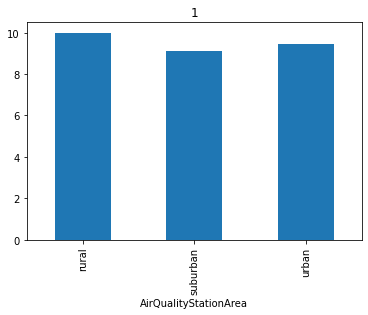

In [410]:
df_serbia_v2[df_serbia_v2['AirPollutant']==1].groupby('AirQualityStationArea')['Concentration'].median().plot.bar(title='1')
plt.show()

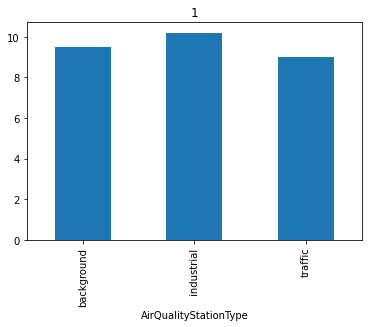

In [411]:
df_serbia_v2[df_serbia_v2['AirPollutant']==1].groupby('AirQualityStationType')['Concentration'].median().plot.bar(title='1')
plt.show()

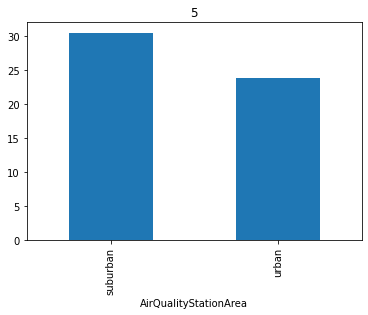

In [412]:
df_serbia_v2[df_serbia_v2['AirPollutant']==5].groupby('AirQualityStationArea')['Concentration'].median().plot.bar(title='5')
plt.show()

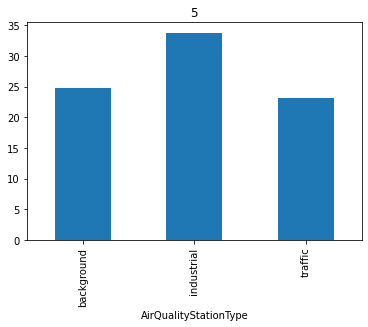

In [413]:
df_serbia_v2[df_serbia_v2['AirPollutant']==5].groupby('AirQualityStationType')['Concentration'].median().plot.bar(title='5')
plt.show()

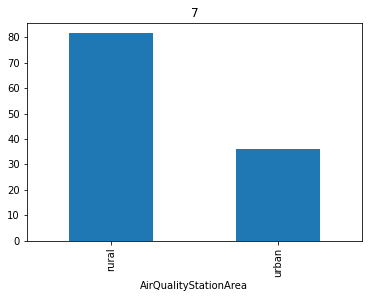

In [414]:
df_serbia_v2[df_serbia_v2['AirPollutant']==7].groupby('AirQualityStationArea')['Concentration'].median().plot.bar(title='7')
plt.show()

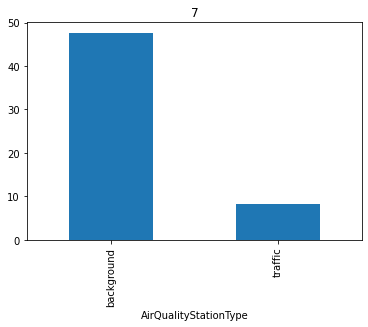

In [415]:
df_serbia_v2[df_serbia_v2['AirPollutant']==7].groupby('AirQualityStationType')['Concentration'].median().plot.bar(title='7')
plt.show()

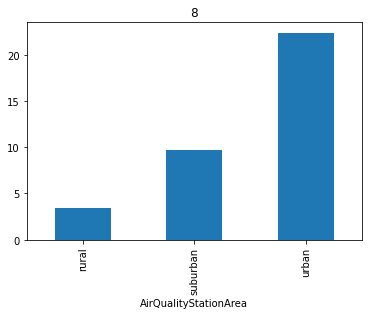

In [416]:
df_serbia_v2[df_serbia_v2['AirPollutant']==8].groupby('AirQualityStationArea')['Concentration'].median().plot.bar(title='8')
plt.show()

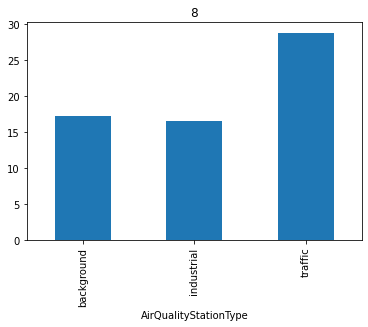

In [417]:
df_serbia_v2[df_serbia_v2['AirPollutant']==8].groupby('AirQualityStationType')['Concentration'].median().plot.bar(title='8')
plt.show()

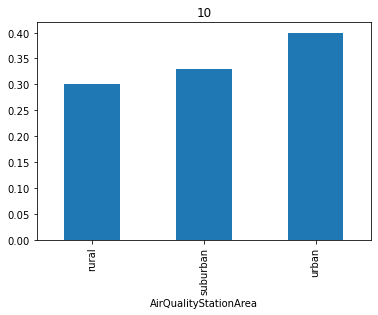

In [418]:
df_serbia_v2[df_serbia_v2['AirPollutant']==10].groupby('AirQualityStationArea')['Concentration'].median().plot.bar(title='10')
plt.show()

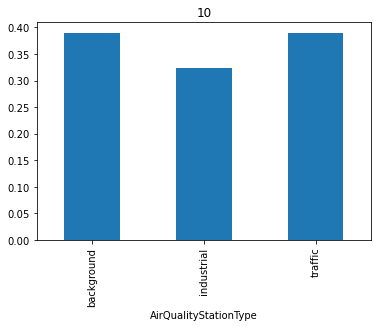

In [419]:
df_serbia_v2[df_serbia_v2['AirPollutant']==10].groupby('AirQualityStationType')['Concentration'].median().plot.bar(title='10')
plt.show()

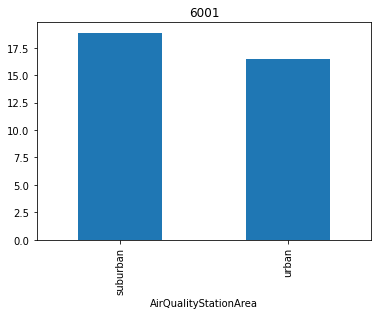

In [420]:
df_serbia_v2[df_serbia_v2['AirPollutant']==6001].groupby('AirQualityStationArea')['Concentration'].median().plot.bar(title='6001')
plt.show()

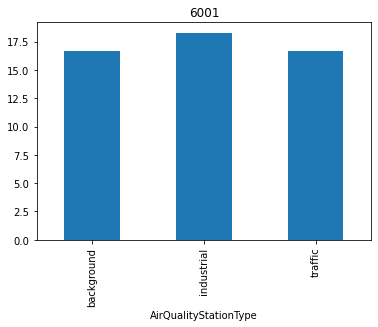

In [421]:
df_serbia_v2[df_serbia_v2['AirPollutant']==6001].groupby('AirQualityStationType')['Concentration'].median().plot.bar(title='6001')
plt.show()

In [ ]:
# from pandas import option_context
# with option_context('display.max_colwidth', 400):
#     display(df_meta2.head(50))

In [ ]:
# display(df_merged.describe(include='all'))

In [ ]:
# df_serbia_v2['DatetimeDelta'] = DatetimeEnd - DatetimeBegin

In [ ]:
### Restructure dataset into timeseries

# df_main.info(verbose=True, show_counts=True)
# display(df_main.head(1))